![](https://snag.gy/h9Xwf1.jpg)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas`

_Authors: Tim Book_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.
- Practice plotting with pandas.

### Lesson Guide

- What is `pandas`?
- Reading data
- Exploring data
    - Filtering
    - Sorting
- Split-Apply-Combine
- Missing Values

<a id='introduction'></a>

### What is `pandas`?

---

- Data analysis library - **Panel data system** (doesn't actually have to do with the animal, sorry).
- Created by Wes McKinney and Open Sourced by AQR Capital Management, LLC 2009.
- Implemented in highly optimized Python/Cython.
- Most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.


### Pandas Use Cases

---

- Cleaning data / Munging
- Exploratory Data Analysis (EDA)
- Structuring data for plots or tabular display
- Joining disparate sources
- Filtering, extracting, or transforming 

## Importing the Dynamic Trio
From here on out, we'll begin pretty much all of our notebooks with the following three imports.

* **pandas**: The library we'll be using to do pretty much all data manipulation.
* **numpy**: The library we'll need to do various other computations. Even if you don't think you'll need it to start, you'll probably end up using it later.
* **matplotlib**: The library we'll use most for plotting. More on this another day.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Discussion: Where do you think a data scientist spends most of their time?

`/poll "Where do you think a data scientist spends most of their time?" "Moving data" "Cleaning data" "Exploring data" "Plotting data" "Predictive modeling" anonymous limit 1`

<a id='loading_csvs'></a>

### Loading a csv into a DataFrame

---

Pandas can load many types of files, but one of the most common filetypes for storing data is in a ```.csv``` file. Let's load a dataset on drug use by age from the ```./datasets``` directory:

In [2]:
ufo = pd.read_csv('datasets/ufo.csv')

In [3]:
type(ufo)

pandas.core.frame.DataFrame

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will barely scratch the surface of DataFrame functionality in this lesson, but over the course of this class you will become an expert at using them.

<a id='exploring_data'></a>

## Exploratory Data Analysis (EDA) with Python!

---

DataFrames come with built-in functionality that makes data exploration easy. 

Let's start by looking at the "head" of your data with the `.head()` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

In [5]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


<a id='data_dimensions'></a>

### Data dimensions

---

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

In [6]:
ufo.shape

(80543, 5)

`/poll "In terms of rows, is this the largest dataset you've ever worked with?" "Yes" "No" "Not sure, but I'm not impressed anyway" anonymous limit 1`

You will notice that this is operates the same as `.shape` for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed.

Look at the names of your columns with the ```.columns``` property.

In [7]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

Accessing a specific column is easy. You can use the bracket syntax just like python dictionaries with the string name of the column to extract that column.

In [9]:
ufo['City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [13]:
# Try to refrain from doing this...
# THREAD: Why shouldn't you rely on this? (There are several good reasons).
ufo.City.tail(10)

80533        Melbourne
80534         Burleson
80535    Elizabethtown
80536          Wyoming
80537           Neligh
80538           Neligh
80539     Uhrichsville
80540           Tucson
80541      Orland park
80542         Loughman
Name: City, dtype: object

As you can see we can also use the ```.head()``` function on a single column, which is represented as a pandas Series object.

You can also access a column (as a DataFrame instead of a Series) or multiple columns with a list of strings.

In [17]:
ufo[['City']].head()

,City
0,Ithaca
1,Willingboro
2,Holyoke
3,Abilene
4,New York Worlds Fair


In [ ]:
ufo.head()

<a id='dataframe_series'></a>

### DataFrame vs. Series

---

We've been playing with them, so I guess we should define them formally:

* A **`Series`** is a one-dimensional array of values **with an index**.
* A **`DataFrame`** is a two-dimensional array of values **with both a row and column index**.
* It turns out - each column of a `DataFrame` is actually a `Series`!

![](./assets/series-vs-df.png)

There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [18]:
print(type(ufo['City']))
print(type(ufo[['City']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
ufo[['City','State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


<a id='info'></a>

### Examining your data with `.info()`

---

The `.info()` should be the first thing you look at when getting acquainted with a new dataset.

**Types** are very important.  They impact the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and when you can encounter unexpected results.

> _Typical problems when working with new datasets_:
> - Missing values
> - Unexpected types (string/object instead of int/float)
> - Dirty data (commas, dollar signs, unexpected characters, etc)
> - Blank values that are actually "non-null" or single white-space characters

`.info()` is a function that is available on every **DataFrame** object. It gives you information about:

- Name of column / variable attribute
- Type of index (RangeIndex is default)
- Count of non-null values by column / attribute
- Type of data contained in column / attribute
- Unqiue counts of dtypes (Pandas data types)
- Memory usage of our dataset


In [23]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [24]:
ufo.shape

(80543, 5)

## Aside:  Working with "Big Data"

---

The term **Big Data** has become a little bit of a buzzword with no clear, consensus definition. The most common definition is that **Big Data are data that are too big to fit in your computer's memory.**

![](https://snag.gy/UGNamo.jpg)

The reason that this definition is good is because when your data size exceeds your RAM, you have to use a separate set of tools to solve your problems. For example:

* Spark (Week 11!)
* Hadoop
* Being clever with how you read and use data
    - Separate it into small chunks for example.

<a id='describe'></a>

## Quick Summaries

---

The `.describe()` function is very useful for taking a quick look at your data. It gives you some of the basic descriptive statistics.

You can use `.value_counts()` to get a good tabular view of a categorical variable.

In [25]:
# Let's read in the diamonds data set.
diamonds_df = pd.read_csv('datasets/diamonds.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
diamonds_df.shape

(53940, 10)

In [26]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [28]:
# Let's describe the price
diamonds_df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [29]:
# We can even do it to the whole DataFrame - what does that look like?
# What's missing?
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [30]:
# Let's count up the cuts
diamonds_df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [31]:
# Let's do the same thing, but normalized
diamonds_df['cut'].value_counts(normalize=True)

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values 
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

There are built-in math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the ```.mean()``` function on the ```drug``` DataFrame to get the mean for every column.

In [32]:
diamonds_df['price'].mean()

3932.799721913237

In [33]:
diamonds_df['price'].median()

2401.0

In [35]:
diamonds_df['price'].quantile([0.1, 0.2])

0.1    646.0
0.2    837.0
Name: price, dtype: float64

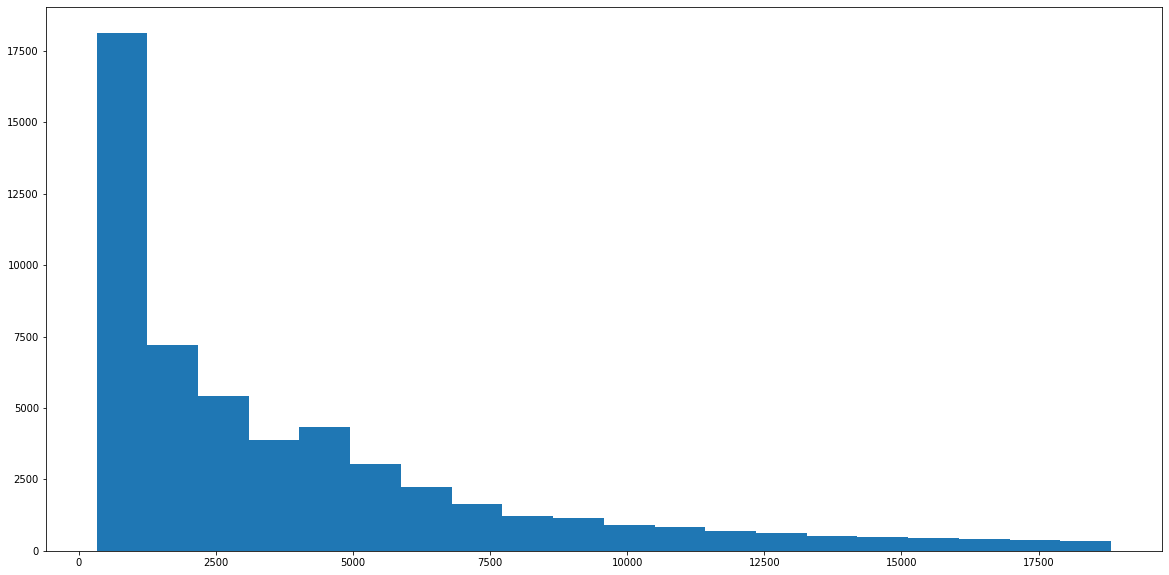

In [40]:
plt.figure(figsize=(20,10))
plt.hist(diamonds_df['price'], bins=20);

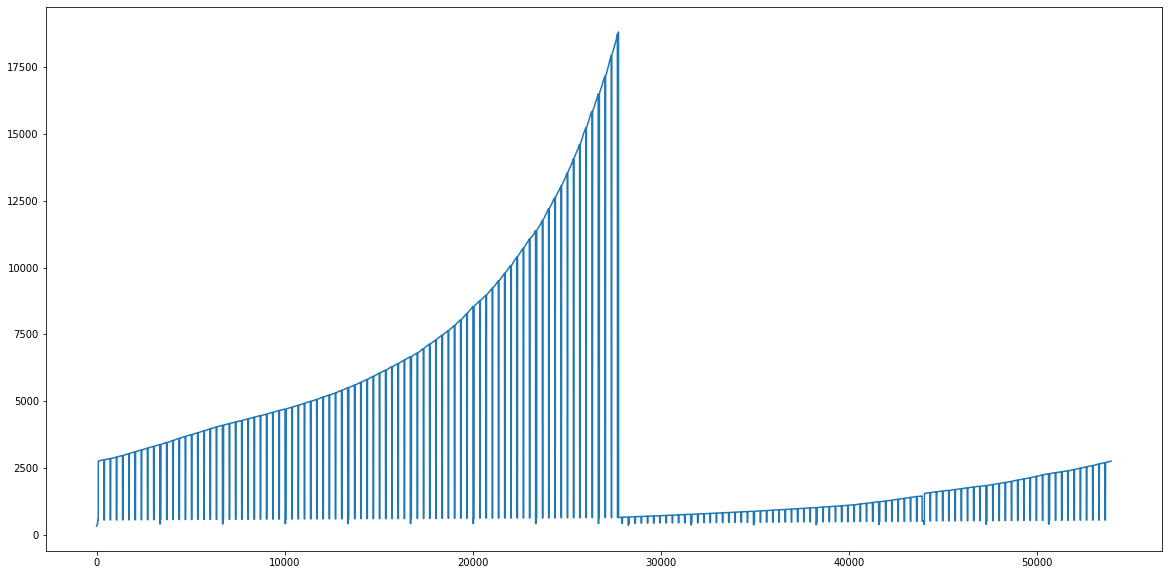

In [42]:
plt.figure(figsize=(20,10))
plt.plot(diamonds_df['price'])

In [44]:
diamonds_df['price'].tail(10)

53930    2756
53931    2756
53932    2757
53933    2757
53934    2757
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, dtype: int64

<a id='independent_practice'></a>

### Now you!

---

Now that we know a little bit about basic DataFrame use, let's practice on a new dataset.

> Pro tip:  You can use the "tab" key to browse filesystem resources when your cursor is in a string to get a relative reference to the files that can be loaded in Jupyter notebook.  Remember, you have to use your arrow keys to navigate the files populated in the UI. 

<img src="https://snag.gy/IlLNm9.jpg">

1. Read in the `cars.csv` dataset. (call it `cars`)
1. What is the mean `mpg` for cars in this dataset?

In [45]:
cars = pd.read_csv('datasets/cars.csv')
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [46]:
cars['mpg'].mean()

20.090624999999996

In [47]:
cars.shape

(32, 11)

In [51]:
cars['mpg'][0]

21.0

## Filtering
We usually don't need to operate on the _whole_ dataset. A very common task is to parse it down to only the pieces we need.

In [52]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [53]:
v = np.array([12, 98, 9, 50, 23])

In [54]:
v

array([12, 98,  9, 50, 23])

In [55]:
# What do you think the result of this cell is?
v[[True, False, True, False, True]]

array([12,  9, 23])

In [56]:
# How about this?
v < 40

array([ True, False,  True, False,  True])

In [57]:
# So...
v[v < 40]

array([12,  9, 23])

In [58]:
# And this?
cars['mpg'] > 30

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
Name: mpg, dtype: bool

In [59]:
# Finally...
cars[cars['mpg'] > 30]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


Filtering in pandas uses vectors of booleans to describe inclusion or exclusion. `True` means you're in, `False` means you're out.

In [60]:
# This functions identically to the code above, and can sometimes feels a little cleaner.
# Variables that serve this function are sometimes called "masks"
high_mpg = cars['mpg'] > 30
cars[high_mpg]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


### Multiple Filters
Often we want to filter based on multiple conditions. We can use the usual "and" and "or" logic, but the symbols change for mystical (read: annoying) Python reasons.

In [62]:
# "And" logic - use ampersand (&)
# Note parentheses mandatory!
cars[(cars['cyl']==4) & (cars['am']==1) ]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
31,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2


In [65]:
# "Or" logic - use pipe (|)
cars_subset_df = cars[(cars['mpg']<15) | (cars['mpg']>30) ]
cars_subset_df.shape

(9, 11)

### Now you:

In [66]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [67]:
# (THREAD): Show me all the UFO sightings in City = 'Towaco' and State = 'NJ"
# Anything interesting?
ufo[(ufo['City']=='Towaco') & (ufo['State']=='NJ')]

,City,Colors Reported,Shape Reported,State,Time
1585,Towaco,NaN,CIRCLE,NJ,5/20/1968 19:00
45630,Towaco,NaN,TRIANGLE,NJ,8/13/2008 1:00
71134,Towaco,NaN,OVAL,NJ,7/15/2013 22:00


### Aside: Some shortcuts

In [70]:
cars[cars['mpg'].between(24, 30)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,24.4,4,146.7,62,3.69,3.190,20.0,1,0,4,2
25,27.3,4,79.0,66,4.08,1.935,18.9,1,1,4,1
26,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2


In [71]:
cars[~cars['mpg'].between(14, 31)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4


In [72]:
ufo[ufo['City'].isin(['Towaco', 'Montville'])]

,City,Colors Reported,Shape Reported,State,Time
1585,Towaco,NaN,CIRCLE,NJ,5/20/1968 19:00
29123,Montville,NaN,VARIOUS,OH,6/10/2004 21:00
34461,Montville,NaN,CONE,OH,10/20/2005 20:00
45630,Towaco,NaN,TRIANGLE,NJ,8/13/2008 1:00
55349,Montville,NaN,DISK,CT,11/10/2010 19:40
71134,Towaco,NaN,OVAL,NJ,7/15/2013 22:00


<a id='indexing'></a>

## Pandas Indexing: `.loc` and `.iloc`

---

So far we've learned how to select both rows and columns. The savvy and skeptical student would have noticed a problem here. We have ambiguous notation! What does this do:

```python
data[something]
```

We can't tell! Is `something` a mask or a string? One selects rows, the other selects columns. **What if we wanted to filter rows and select columns at the same time?!**

Pandas has two properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> There used to be a third, `.ix` which is now deprecated and shan't ever be used again.

## `.loc` is Most Common
The syntax of `.loc` is pretty intuitive:

```python
data.loc[rows, columns]
```

Where `rows` is often a filter (ie, a **mask**), and `columns` is a list of columns, or even just `:` to select all columns.

In [73]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [75]:
ufo.loc[(ufo['City']=='Abilene') & (ufo['State']=='TX'), ['City', 'State', 'Shape Reported']]

,City,State,Shape Reported
6654,Abilene,TX,TRIANGLE
8357,Abilene,TX,SPHERE
10883,Abilene,TX,NaN
21416,Abilene,TX,LIGHT
23169,Abilene,TX,DISK
31405,Abilene,TX,OVAL
32596,Abilene,TX,LIGHT
32737,Abilene,TX,LIGHT
35375,Abilene,TX,LIGHT
35412,Abilene,TX,LIGHT


In [77]:
ufo.loc[ufo['State']=='TX', :].head()

,City,Colors Reported,Shape Reported,State,Time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00
114,Post,NaN,DISK,TX,9/15/1949 21:00


### Acccctually.....
![](assets/actually.png)
According to **_The Zen of Python_**, explicit is better than implicit. `.loc` is explicit. **Most people choose to always use `.loc` instead of the ambiguous `data[something]` notation! This is a pretty good idea! When in doubt, use `.loc`!**

### `.iloc` is rare, but useful
The `i` stands for "integer" and will give you the actual zero-indexed numerical indices.

In [78]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [83]:
cars.iloc[:3,4:6]

,drat,wt
0,3.90,2.620
1,3.90,2.875
2,3.85,2.320


In [84]:
cars.shape

(32, 11)

In [87]:
cars.iloc[28:,0:5]

,mpg,cyl,disp,hp,drat
28,15.8,8,351.0,264,4.22
29,19.7,6,145.0,175,3.62
30,15.0,8,301.0,335,3.54
31,21.4,4,121.0,109,4.11


## Sorting

In [89]:
# We can sort individual Series...
cars['mpg'].sort_values().head()

15    10.4
14    10.4
23    13.3
6     14.3
16    14.7
Name: mpg, dtype: float64

In [90]:
cars['mpg'].sort_values(ascending=False).head(10)

19    33.9
17    32.4
18    30.4
27    30.4
25    27.3
26    26.0
7     24.4
2     22.8
8     22.8
20    21.5
Name: mpg, dtype: float64

In [94]:
# Or the entire DataFrame
cars.sort_values(['mpg','cyl'])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
22,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


### Now You:

In [95]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [96]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [97]:
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [98]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             80496 non-null  object        
 1   Colors Reported  17034 non-null  object        
 2   Shape Reported   72141 non-null  object        
 3   State            80543 non-null  object        
 4   Time             80543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


In [99]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [101]:
# Give me the 5 most recent UFO sightings in Roswell, New Mexico.
# You'll need to filter and use .sort_values()
# This is a hard one!
ufo[(ufo['City'] == 'Roswell') & (ufo['State']=='NM')].sort_values('Time',ascending=False).head()

,City,Colors Reported,Shape Reported,State,Time
80459,Roswell,ORANGE,CIRCLE,NM,2014-09-01 20:00:00
80056,Roswell,NaN,OTHER,NM,2014-08-18 15:00:00
67040,Roswell,NaN,FLASH,NM,2012-11-08 22:30:00
58960,Roswell,NaN,LIGHT,NM,2011-09-04 19:50:00
55978,Roswell,NaN,EGG,NM,2011-01-16 14:30:00


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ For example, the price of a diamond probably varies widely between different diamond cuts. To tackle this problem, we'll use the **Split-Apply-Combine** technique. (This is sometimes called **MapReduce**, but is more of a special case of MapReduce). 

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in pandas (the **Combine** step is done for us).

In [102]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [104]:
diamonds_df.shape

(53940, 10)

In [103]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [172]:
# What is the mean price by diamond cut?
diamonds_df.groupby('cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Very Good    3981.759891
Premium      4584.257704
Ideal        3457.541970
Name: price, dtype: float64

In [106]:
diamonds_df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [115]:
np.unique(diamonds_df['cut'])

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [107]:
# Can we just describe each price by cut?
diamonds_df.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


In [108]:
# What if I want my own recipe of statistics?
diamonds_df.groupby('cut')['price'].agg(['count','median','mean'])

,count,median,mean
cut,,,
Fair,1610,3282.0,4358.757764
Good,4906,3050.5,3928.864452
Ideal,21551,1810.0,3457.541970
Premium,13791,3185.0,4584.257704
Very Good,12082,2648.0,3981.759891


### Now You:
What is the mean miles per gallon for each cylinder size?

In [109]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [118]:
cars.groupby('cyl')['mpg']

In [110]:
cars.groupby('cyl')['mpg'].mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

### Advanced Split-Apply-Combining
Feel free to skip!

In [112]:
# What if I want my own home-spun aggregate function?

# Maybe the mean of the log-price is interesting to you?
def log_mean(p):
    return np.mean(np.log(p))

diamonds_df.groupby('cut')['price'].agg(['count', 'mean', log_mean])

,count,mean,log_mean
cut,,,
Fair,1610,4358.757764,8.093441
Good,4906,3928.864452,7.842809
Ideal,21551,3457.541970,7.639467
Premium,13791,4584.257704,7.950795
Very Good,12082,3981.759891,7.798664


In [113]:
def tenpercent_quantile(p):
    return np.quantile(p,0.1)

In [114]:
diamonds_df.groupby('cut')['price'].agg(['mean', 'median', tenpercent_quantile])

,mean,median,tenpercent_quantile
cut,,,
Fair,4358.757764,3282.0,1114
Good,3928.864452,3050.5,603
Ideal,3457.541970,1810.0,652
Premium,4584.257704,3185.0,709
Very Good,3981.759891,2648.0,576


In [120]:
# deprecated in the latest version
# What if I want functions of different columns?
diamonds_df.groupby('cut').agg({
    'price': {'count': 'count', 'price_mean': 'mean'},
    'carat': {'carat_mean': 'mean'}
})

SpecificationError: nested renamer is not supported

## Adding, Dropping, Renaming, and `inplace` Methods

In [122]:
# Adding a column is easy, just define it!
# What if I wanted km per gal instead of miles per gal?
cars['kmpg'] = cars['mpg'] * 1.61

In [123]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmpg
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,33.810
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,33.810
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,36.708
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,34.454
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,30.107


In [125]:
# Oops - that actually doesn't make sense since they'd be using liters anyway.
# Let's drop it.
cars.drop('kmpg',axis=1).head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [126]:
# But... it's not gone?
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmpg
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,33.810
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,33.810
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,36.708
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,34.454
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,30.107


In [127]:
cars.drop('kmpg',axis=1,inplace=True) # cars = cars.drop('kmpg',axis=1)

In [128]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


###  Inplace Methods!
There are several methods in pandas that don't "stick" unless you tell them to. These methods will always have `inplace=False` by default. If you want to run a method and have it "stick" - assign `inplace=True`.

For example...

### Renaming Columns

In [129]:
# Yuck - I hate spaces and capital letters
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [131]:
# Lowercaseifying is easy:
# The "columns" attribute of a DataFrame works just like a numpy array or Series.
ufo.columns = ufo.columns.str.lower()

In [132]:
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [133]:
# The .rename method
ufo.rename(columns={
    "colors reported" : "colours",
    "shape reported": "shape"
},inplace=True)

In [134]:
ufo.head()

,city,colours,shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [135]:
#Alternative way to rename
#ufo.columns =["city","colors","shape","state","time"]

In [136]:
ufo.head()

,city,colors,shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


### Aside: `str` and `dt` methods
There are a lot of familiar string and date operations we can perform on columns. Strangely, they exist within a pandas submodule and so have to be prefixed with `str` and `dt` respectively.

In [137]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    80496 non-null  object        
 1   colors  17034 non-null  object        
 2   shape   72141 non-null  object        
 3   state   80543 non-null  object        
 4   time    80543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


In [138]:
ufo['shape'].str.lower().head()

0    triangle
1       other
2        oval
3        disk
4       light
Name: shape, dtype: object

In [140]:
ufo['shape'] = ufo['shape'].str.lower()

In [141]:
ufo.head()

,city,colors,shape,state,time
0,Ithaca,NaN,triangle,NY,1930-06-01 22:00:00
1,Willingboro,NaN,other,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,oval,CO,1931-02-15 14:00:00
3,Abilene,NaN,disk,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,light,NY,1933-04-18 19:00:00


In [142]:
ufo['shape'].str.replace('o', 'bro').head()

0    triangle
1     brother
2      broval
3        disk
4       light
Name: shape, dtype: object

In [143]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    80496 non-null  object        
 1   colors  17034 non-null  object        
 2   shape   72141 non-null  object        
 3   state   80543 non-null  object        
 4   time    80543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


In [145]:
ufo.head()

,city,colors,shape,state,time
0,Ithaca,NaN,triangle,NY,1930-06-01 22:00:00
1,Willingboro,NaN,other,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,oval,CO,1931-02-15 14:00:00
3,Abilene,NaN,disk,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,light,NY,1933-04-18 19:00:00


In [144]:
# We already did this above, but datetime variables need to be converted specially.
# ufo['time'] = pd.to_datetime(ufo['time'])
ufo['time'].dt.year.head()

0    1930
1    1930
2    1931
3    1931
4    1933
Name: time, dtype: int64

## Missing Values

In [146]:
s = pd.Series([5, 7, np.nan, 2, 10])

In [147]:
s

0     5.0
1     7.0
2     NaN
3     2.0
4    10.0
dtype: float64

In [148]:
# Hmm...
s == np.nan

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [149]:
s.isnull()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [150]:
s.notnull()

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [151]:
ufo.head()

,city,colors,shape,state,time
0,Ithaca,NaN,triangle,NY,1930-06-01 22:00:00
1,Willingboro,NaN,other,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,oval,CO,1931-02-15 14:00:00
3,Abilene,NaN,disk,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,light,NY,1933-04-18 19:00:00


In [152]:
ufo.isnull().head()

,city,colors,shape,state,time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [153]:
ufo.isnull().sum()

city         47
colors    63509
shape      8402
state         0
time          0
dtype: int64

In [154]:
ufo.head()

,city,colors,shape,state,time
0,Ithaca,NaN,triangle,NY,1930-06-01 22:00:00
1,Willingboro,NaN,other,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,oval,CO,1931-02-15 14:00:00
3,Abilene,NaN,disk,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,light,NY,1933-04-18 19:00:00


In [155]:
# Easy way to filter out missings!
ufo.loc[ufo['colors'].notnull(),:].head()

,city,colors,shape,state,time
12,Belton,RED,sphere,SC,1939-06-30 20:00:00
19,Bering Sea,RED,other,AK,1943-04-30 23:00:00
36,Portsmouth,RED,formation,VA,1945-07-10 01:30:00
44,Blairsden,GREEN,sphere,CA,1946-06-30 19:00:00
66,Wexford,BLUE,NaN,PA,1947-07-01 20:00:00


## Exporting Data
We can read data, but how do we save it so we can send it out? pandas has several methods of the form `.to_*()`.

In [158]:
cars.loc[cars['mpg']>30,:].to_csv('datasets/highmpgcars.csv',index=False)

<a id='review'></a>

### Review

---

 - What would we do with a dataset when we first acquire it?
 - What's important to consider when first looking at a dataset? 
 - What are some common problems we can run into with new data?
 - What are some common operations with DataFrames?
 - How do we slice? Index? Filter?

# EXTRA MATERIALS
![](assets/biohazard.png)
Everything that follows is considered advanced or "too much" for our first session with pandas, and may not be explicitly covered by the instructor. If the instructor _does_ cover it, please don't worry that you don't understand this on your first pass.

**THAT DOES NOT MEAN THESE TOPICS ARE UNIMPORTANT OR RARELY USED!** We highly _highly_ recommend you take a look at these on your own time.

### Merging

In [159]:
movies = pd.read_csv(
    'datasets/movies.tbl',
    sep='|',
    encoding='latin1',
    header=None,
    names=['movie_id', 'title'],
    usecols=[0, 1]
)
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [160]:
movies.shape

(1682, 2)

In [161]:
ratings = pd.read_csv(
    'datasets/movie_ratings.tsv',
    sep='\t',
    header=None,
    names=['user_id', 'movie_id', 'rating', 'timestamp']
)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [162]:
ratings.shape

(100000, 4)

In [163]:
movie_reviews = pd.merge(ratings, movies, how='left')
movie_reviews.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [164]:
print(movies.shape)
print(ratings.shape)
print(movie_reviews.shape)

(1682, 2)
(100000, 4)
(100000, 5)


In [165]:
movie_reviews[movie_reviews['movie_id']==242].head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
253,63,242,3,875747190,Kolya (1996)
629,226,242,5,883888671,Kolya (1996)
1232,154,242,3,879138235,Kolya (1996)
2159,306,242,5,876503793,Kolya (1996)


### "Categorical" Variables
Despite the name, when pandas says "Categorical", they really mean "Ordinal" - that is, ordered categories.

For example, check out the following crosstab:

In [166]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [167]:
diamonds_df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [169]:
pd.crosstab(diamonds_df['cut'], diamonds_df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


The "cuts" are not in the right order! They're actually in alphabetical order. We can fix this by telling pandas that there really is an important ordering here.

In [170]:
diamonds_df['cut'] = pd.Categorical(diamonds_df['cut'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

In [171]:
pd.crosstab(diamonds_df['cut'], diamonds_df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Very Good,1513,2400,2164,2299,1824,1204,678
Premium,1603,2337,2331,2924,2360,1428,808
Ideal,2834,3903,3826,4884,3115,2093,896


### Categorizing with `.map()`

In [174]:
cars['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [175]:
cars['cyl_word'] = cars['cyl'].map({4: 'Four', 6: 'Six', 8: 'Eight'})
cars['cyl_word'].value_counts()

Eight    14
Four     11
Six       7
Name: cyl_word, dtype: int64

In [176]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_word
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Four
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Eight


In [177]:
def is_efficient(x):
    if x > 20:
        return "Efficient"
    else:
        return "Wasteful"
    
cars['fuel_economy'] = cars['mpg'].map(is_efficient)
cars['fuel_economy'].value_counts()

Wasteful     18
Efficient    14
Name: fuel_economy, dtype: int64

In [189]:
#lambda function for mapping

cars['fuel_economy_1'] = cars['mpg'].map(lambda x : 'Efficient' if x > 20 else "Wasteful")

In [190]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_word,fuel_economy,fuel_economy_1
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Six,Efficient,Efficient
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Six,Efficient,Efficient
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Four,Efficient,Efficient
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Six,Efficient,Efficient
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Eight,Wasteful,Wasteful


### Advanced Data Manipulation with `.apply()`
The `.apply()` method is very similar to `.map()`, except more advanced. You can apply a function along any axis of a `DataFrame`. `.apply()` is our "Swiss army knife" for data manipulation - if something can't be solved with ordinary means, it might be time for a `.apply()`.

In [179]:
sizes = pd.Series([8, 4, 5, 'L', 2, 12, 16, 8, 'XL'])

In [180]:
sizes

0     8
1     4
2     5
3     L
4     2
5    12
6    16
7     8
8    XL
dtype: object

In [181]:
def to_num(x):
    try:
        out = float(x)
    except:
        out = np.nan
    return out

In [182]:
sizes.apply(to_num)

0     8.0
1     4.0
2     5.0
3     NaN
4     2.0
5    12.0
6    16.0
7     8.0
8     NaN
dtype: float64

In [183]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_word,fuel_economy
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Six,Efficient
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Six,Efficient
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Four,Efficient
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Six,Efficient
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Eight,Wasteful


In [184]:
def describe_car(row):
    efficiency = row['fuel_economy'].lower()
    cyl = row['cyl_word'].lower()
    auto = 'automatic' if row['am'] == 1 else 'manual'
    print(f"This {cyl} cylinder car has {auto} transmission and a(n) {efficiency} fuel economy.")

In [185]:
cars.head().apply(describe_car, axis=1)

This six cylinder car has automatic transmission and a(n) efficient fuel economy.
This six cylinder car has automatic transmission and a(n) efficient fuel economy.
This four cylinder car has automatic transmission and a(n) efficient fuel economy.
This six cylinder car has manual transmission and a(n) efficient fuel economy.
This eight cylinder car has manual transmission and a(n) wasteful fuel economy.


0    None
1    None
2    None
3    None
4    None
dtype: object

BONUS QUESTION: Why are there 5 "None" valus in the above output?